## Repositorio de Shape Files de Chile censo 2017
De este repo podrás descargar los shapefile con la información  de la latitud y longitud Chile. Nos interesa la región 13 ya que es la región en la que se encuentra Santiago, la ciudad de interés.

https://github.com/diegocaro/chile_census_2017_shapefiles/tree/master/R13


## Cargando los Datos de Santiago Chile

In [8]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Cursos y CADIs y Capacitaciones Impartidas/Concentración Inteligencia Artificial avanzada para la Ciencia de Datos/Bloque II/Reto/Actividades/R13


In [9]:
%cd "/content/gdrive/MyDrive/Cursos y CADIs y Capacitaciones Impartidas/Concentración Inteligencia Artificial avanzada para la Ciencia de Datos/Bloque II/Reto/Actividades/R13"
!ls

/content/gdrive/MyDrive/Cursos y CADIs y Capacitaciones Impartidas/Concentración Inteligencia Artificial avanzada para la Ciencia de Datos/Bloque II/Reto/Actividades/R13
CALLES_PAIS_C17.CPG		  LOCALIDAD_C17.dbf
CALLES_PAIS_C17.dbf		  LOCALIDAD_C17.prj
CALLES_PAIS_C17.prj		  LOCALIDAD_C17.shp
CALLES_PAIS_C17.sbn		  LOCALIDAD_C17.shp.xml
CALLES_PAIS_C17.sbx		  LOCALIDAD_C17.shx
CALLES_PAIS_C17.shp		  MANZANA_ALDEA_C17.cpg
CALLES_PAIS_C17.shp.xml		  MANZANA_ALDEA_C17.dbf
CALLES_PAIS_C17.shx		  MANZANA_ALDEA_C17.prj
COMUNA_C17.cpg			  MANZANA_ALDEA_C17.shp
COMUNA_C17.dbf			  MANZANA_ALDEA_C17.shp.xml
COMUNA_C17.prj			  MANZANA_ALDEA_C17.shx
COMUNA_C17.shp			  MANZANA_IND_C17.cpg
COMUNA_C17.shp.xml		  MANZANA_IND_C17.dbf
COMUNA_C17.shx			  MANZANA_IND_C17.prj
DISTRITO_C17.cpg		  MANZANA_IND_C17.shp
DISTRITO_C17.dbf		  MANZANA_IND_C17.shp.xml
DISTRITO_C17.prj		  MANZANA_IND_C17.shx
DISTRITO_C17.shp		  MANZANA_SIN_INF_C17.cpg
DISTRITO_C17.shp.xml		  MANZANA_SIN_INF_C17.dbf
DISTRITO_C17.shx		

Este tutorial es de Marcelo Rovai y se puede encontrar la versión completa en [mapping geograph data in python](https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f)

In [10]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import shapefile as shp

sf = shp.Reader("COMUNA_C17.shp")
sf

## El objeto shape file 


In [24]:
sf.records()[:5]

[Record #0: ['13', 'REGIÓN METROPOLITANA DE SANTIAGO', '134', 'MAIPO', '13404', 'PAINE', 1.62533016363, 0.0660348868419],
 Record #1: ['13', 'REGIÓN METROPOLITANA DE SANTIAGO', '134', 'MAIPO', '13402', 'BUIN', 0.884164092462, 0.0211662328357],
 Record #2: ['13', 'REGIÓN METROPOLITANA DE SANTIAGO', '131', 'SANTIAGO', '13124', 'PUDAHUEL', 0.720175743678, 0.0191242778676],
 Record #3: ['13', 'REGIÓN METROPOLITANA DE SANTIAGO', '131', 'SANTIAGO', '13103', 'CERRO NAVIA', 0.170180341801, 0.00107596490556],
 Record #4: ['13', 'REGIÓN METROPOLITANA DE SANTIAGO', '133', 'CHACABUCO', '13301', 'COLINA', 1.6920070844, 0.0938201893532]]

In [14]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['REGION', 'C', 2, 0],
 ['NOM_REGION', 'C', 60, 0],
 ['PROVINCIA', 'C', 3, 0],
 ['NOM_PROVIN', 'C', 60, 0],
 ['COMUNA', 'C', 5, 0],
 ['NOM_COMUNA', 'C', 60, 0],
 ['SHAPE_Leng', 'F', 19, 11],
 ['SHAPE_Area', 'F', 19, 11]]

tranformado el shape file object a un pandas data frame

In [12]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [15]:
df = read_shapefile(sf)
df.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,SHAPE_Leng,SHAPE_Area,coords
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,1.625330,0.066035,"[(-70.61889119799997, -33.73808202399994), (-7..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,BUIN,0.884164,0.021166,"[(-70.63191737999995, -33.646343995999985), (-..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,0.720176,0.019124,"[(-70.78913731799997, -33.361528721999946), (-..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,0.170180,0.001076,"[(-70.71927314599998, -33.413342729999954), (-..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,1.692007,0.093820,"[(-70.59630269399997, -32.951375638999934), (-..."


In [16]:
df["coords"][0][:10]

[(-70.61889119799997, -33.73808202399994),
 (-70.61810575499999, -33.73809232199994),
 (-70.61742611899996, -33.73808348899996),
 (-70.61698999999999, -33.73804554999998),
 (-70.61689441599998, -33.73803723499998),
 (-70.61651230799998, -33.73804223999997),
 (-70.61602439299998, -33.73806636699993),
 (-70.61549601499996, -33.73819746099997),
 (-70.61396296099997, -33.73862439299995),
 (-70.61396026599994, -33.73862220999996)]

In [17]:
df[df.NOM_COMUNA == "SANTIAGO"]

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,SHAPE_Leng,SHAPE_Area,coords
47,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,0.24305,0.002244,"[(-70.66560361899997, -33.42810307499997), (-7..."


## Visualizando un Shape File

In [19]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

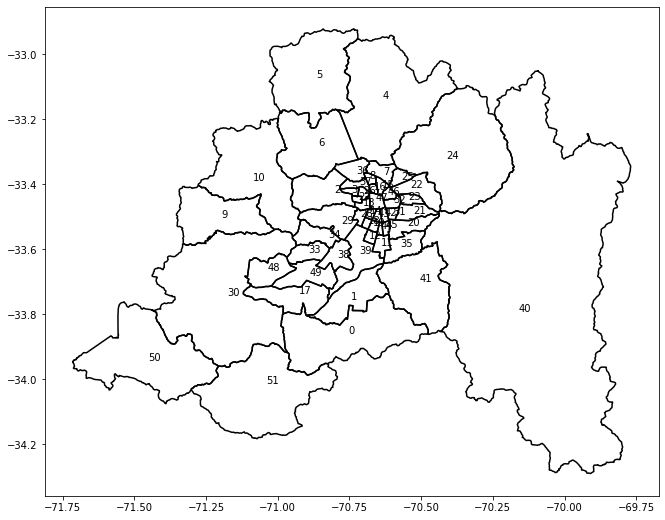

In [20]:
plot_map(sf)